In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

In [3]:
df=pd.read_csv("ks-projects-201801.csv",nrows=10000)
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
ID                  10000 non-null int64
name                10000 non-null object
category            10000 non-null object
main_category       10000 non-null object
currency            10000 non-null object
deadline            10000 non-null object
goal                10000 non-null float64
launched            10000 non-null object
pledged             10000 non-null float64
state               10000 non-null object
backers             10000 non-null int64
country             10000 non-null object
usd pledged         9898 non-null float64
usd_pledged_real    10000 non-null float64
usd_goal_real       10000 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 1.1+ MB


In [5]:
df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.898000e+03,1.000000e+04,1.000000e+04
mean,9.333645e+08,3.932786e+04,1.126714e+04,110.666500,7.722740e+03,1.050871e+04,3.233731e+04
std,2.789635e+08,5.333448e+05,1.300826e+05,960.793867,1.057760e+05,1.266181e+05,3.323909e+05
min,1.003381e+06,1.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,9.100000e-01
25%,1.008698e+09,2.000000e+03,3.300000e+01,2.000000,2.000000e+01,3.300000e+01,2.000000e+03
50%,1.022847e+09,5.000000e+03,6.500000e+02,12.000000,4.210000e+02,6.494450e+02,5.250000e+03
75%,1.036712e+09,1.750000e+04,4.233000e+03,56.000000,3.105000e+03,4.176000e+03,1.619526e+04
max,1.050360e+09,4.000000e+07,8.596475e+06,63416.000000,8.596475e+06,8.596475e+06,2.000000e+07


In [6]:
df.isnull().sum()

ID                    0
name                  0
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         102
usd_pledged_real      0
usd_goal_real         0
dtype: int64

In [7]:
df[["category","main_category"]].nunique()#确认有几类

category         155
main_category     15
dtype: int64

In [8]:
df["category"].value_counts()#有啥

Product Design       618
Music                427
Documentary          425
Tabletop Games       388
Video Games          331
Shorts               329
Film & Video         295
Food                 281
Fiction              256
Fashion              231
Art                  224
Nonfiction           213
Rock                 187
Theater              187
Apparel              177
Indie Rock           166
Children's Books     164
Technology           159
Comics               157
Apps                 155
Photography          144
Webseries            137
Publishing           135
Web                  126
Narrative Film       125
Design               108
Country & Folk       105
Hip-Hop              101
Hardware             100
Public Art            99
                    ... 
Childrenswear          8
Family                 8
Literary Journals      8
Gaming Hardware        8
Punk                   7
Crochet                7
Civic Design           7
Animals                7
Stationery             7


In [9]:
sccess_rate=round(df["state"].value_counts()/len(df["state"])*100,2)#项目成功率
sccess_rate

failed        52.04
successful    35.65
canceled      10.06
undefined      0.96
live           0.83
suspended      0.46
Name: state, dtype: float64

In [10]:
print("before",df.shape)
df=df[(df["state"]=="failed")|(df["state"]=="successful")]#只要成功或者失败

df["state"]=df["state"].map({
    "failed": 0,
    "successful": 1
})
print("after",df.shape)

before (10000, 15)
after (8769, 15)


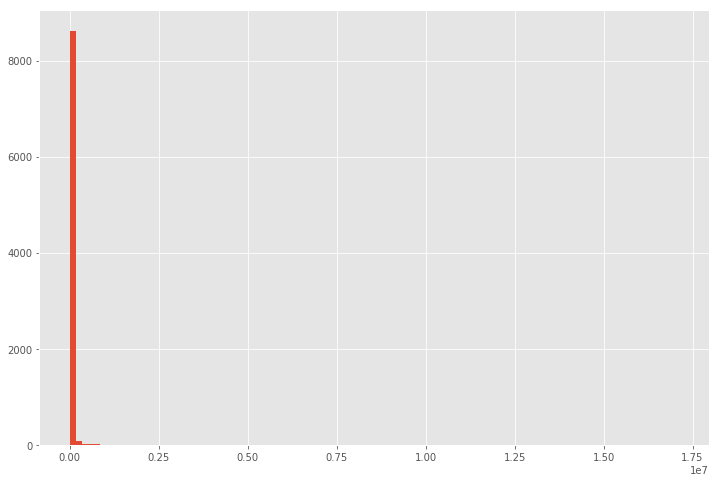

In [11]:
plt.figure(figsize=(12,8))
plt.hist(df["usd_goal_real"],bins=100)
plt.show()

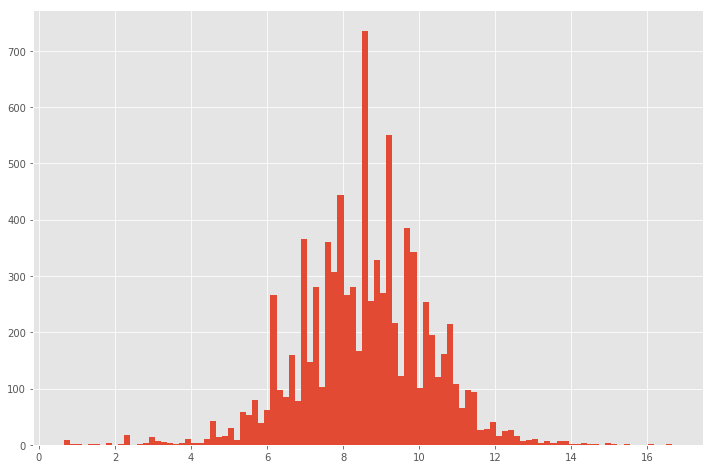

In [12]:
df["usd_goal_real"]=np.log1p(df["usd_goal_real"])
plt.figure(figsize=(12,8))
plt.hist(df["usd_goal_real"],bins=100)
plt.show()

In [13]:
df["deadline"]=pd.to_datetime(df["deadline"],format="%Y-%m-%d %H:%M:%S")
df["launched"]=pd.to_datetime(df["launched"],format="%Y-%m-%d %H:%M:%S")

df["duration"]=(df["deadline"]-df["launched"]).dt.days

df["quarter"]=df["launched"].dt.quarter
df["month"]=df["launched"].dt.month
df["year"]=df["launched"].dt.year
df["dayofweek"]=df["launched"].dt.dayofweek
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,quarter,month,year,dayofweek
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,0,GB,0.0,0.0,7.336253,58,3,8,2015,1
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,15,US,100.0,2421.0,10.308986,59,3,9,2017,5
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,3,US,220.0,220.0,10.714440,44,1,1,2013,5
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,1,US,1.0,1.0,8.517393,29,1,3,2012,5
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,1,224,US,52375.0,52375.0,10.819798,34,1,2,2016,4


In [14]:
df=df.drop(columns={"ID","deadline","goal","launched","pledged","backers","usd pledged","usd_pledged_real"})
df.head()

,name,category,main_category,currency,state,country,usd_goal_real,duration,quarter,month,year,dayofweek
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,0,GB,7.336253,58,3,8,2015,1
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,0,US,10.308986,59,3,9,2017,5
2,Where is Hank?,Narrative Film,Film & Video,USD,0,US,10.714440,44,1,1,2013,5
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,0,US,8.517393,29,1,3,2012,5
5,Monarch Espresso Bar,Restaurants,Food,USD,1,US,10.819798,34,1,2,2016,4


In [15]:
df["name_len"]=df["name"].str.len()
df["num_words"]=df["name"].apply(lambda x:len(str(x).split(" ")))
df.drop(columns=["name"])
df.head()

,name,category,main_category,currency,state,country,usd_goal_real,duration,quarter,month,year,dayofweek,name_len,num_words
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,0,GB,7.336253,58,3,8,2015,1,31,6
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,0,US,10.308986,59,3,9,2017,5,45,8
2,Where is Hank?,Narrative Film,Film & Video,USD,0,US,10.714440,44,1,1,2013,5,14,3
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,0,US,8.517393,29,1,3,2012,5,49,7
5,Monarch Espresso Bar,Restaurants,Food,USD,1,US,10.819798,34,1,2,2016,4,20,3


In [21]:
df=pd.get_dummies(df)
df.head()

,state,usd_goal_real,duration,quarter,month,year,dayofweek,name_len,num_words,name_ Second Life Second Chance (my very first album ),...,country_IT,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,0,7.336253,58,3,8,2015,1,31,6,0,...,0,0,0,0,0,0,0,0,0,0
1,0,10.308986,59,3,9,2017,5,45,8,0,...,0,0,0,0,0,0,0,0,0,1
2,0,10.714440,44,1,1,2013,5,14,3,0,...,0,0,0,0,0,0,0,0,0,1
3,0,8.517393,29,1,3,2012,5,49,7,0,...,0,0,0,0,0,0,0,0,0,1
5,1,10.819798,34,1,2,2016,4,20,3,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import re
#解决ValueError: feature_names may not contain [, ] or <
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]
X=df.drop(columns={"state"})
y=df["state"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
params={
    "silent":1,
    "max_depth":6,
    "min_child_weight":1,
    "eta":0.1,
    "tree_method":"exact",
    "objective":"binary:logistic",
    "eval_metric":"logloss",
    "predictor":"cpu_predictor"
    
}

dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test,label=y_test)

model=xgb.train(params=params,
               dtrain=dtrain,
               num_boost_round=1000,
               early_stopping_rounds=5,
               evals=[(dtest,"test")])


[0]	test-logloss:0.680153
Will train until test-logloss hasn't improved in 5 rounds.
[1]	test-logloss:0.668832
[2]	test-logloss:0.659469
[3]	test-logloss:0.65162
[4]	test-logloss:0.645534
[5]	test-logloss:0.63912
[6]	test-logloss:0.63333
[7]	test-logloss:0.629546
[8]	test-logloss:0.626183
[9]	test-logloss:0.621661
[10]	test-logloss:0.618447
[11]	test-logloss:0.615029
[12]	test-logloss:0.612162
[13]	test-logloss:0.609642
[14]	test-logloss:0.607567
[15]	test-logloss:0.60635
[16]	test-logloss:0.604125
[17]	test-logloss:0.602485
[18]	test-logloss:0.600941
[19]	test-logloss:0.599791
[20]	test-logloss:0.598691
[21]	test-logloss:0.597734
[22]	test-logloss:0.597136
[23]	test-logloss:0.595975
[24]	test-logloss:0.595193
[25]	test-logloss:0.594538
[26]	test-logloss:0.593344
[27]	test-logloss:0.592268
[28]	test-logloss:0.59202
[29]	test-logloss:0.591287
[30]	test-logloss:0.590441
[31]	test-logloss:0.590109
[32]	test-logloss:0.589187
[33]	test-logloss:0.58889
[34]	test-logloss:0.588368
[35]	test-lo

In [62]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(xgb.DMatrix(X_test),ntree_limit=model.best_ntree_limit)
predictions=[round(pred) for pred in y_pred]

acc=accuracy_score(y_test,predictions)
print(round(acc*100,2))

[(6, 0.1),
 (6, 0.05),
 (6, 0.01),
 (7, 0.1),
 (7, 0.05),
 (7, 0.01),
 (8, 0.1),
 (8, 0.05),
 (8, 0.01)]

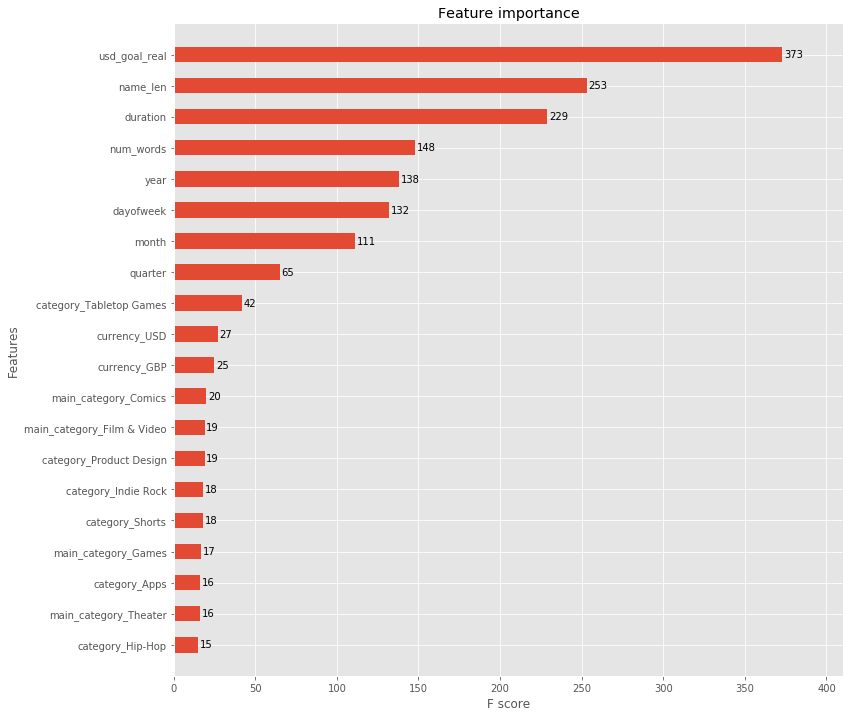

In [34]:
fig,ax=plt.subplots(figsize=(12,12))
xgb.plot_importance(model,max_num_features=20,height=0.5,ax=ax)
plt.show()

In [35]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,\
AdaBoostClassifier,GradientBoostingClassifier

class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def fit(self, x, y):
        return self.clf.fit(x, y)

    def predict(self, x):
        return self.clf.predict(x) 
    
    def predict_proba(self, x):
        return self.clf.predict_proba(x)
#尝试不同params
rfc_params = {
    'n_jobs': -1,
    'n_estimators': 500,
    'warm_start': True, 
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 1
}

etc_params = {
    'n_jobs': -1,
    'n_estimators':500,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 1
}

ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

gbc_params = {
    'n_estimators': 500,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 1
}


In [36]:
rfc=SklearnHelper(RandomForestClassifier,seed=0,params=rfc_params).fit(X_train,y_train)
etc=SklearnHelper(ExtraTreesClassifier,seed=0,params=etc_params).fit(X_train,y_train)
ada=SklearnHelper(AdaBoostClassifier,seed=0,params=ada_params).fit(X_train,y_train)
gbc=SklearnHelper(GradientBoostingClassifier,seed=0,params=gbc_params).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.8s finished


      Iter       Train Loss   Remaining Time 
         1           1.3327            9.35m
         2           1.3140            9.60m
         3           1.2985            9.49m
         4           1.2846            9.48m
         5           1.2728            9.59m
         6           1.2612            9.82m
         7           1.2503           10.11m
         8           1.2401           10.22m
         9           1.2302           10.20m
        10           1.2212           10.24m
        20           1.1625            9.50m
        30           1.1250            8.91m
        40           1.0958            8.94m
        50           1.0778            8.47m
        60           1.0612            8.10m
        70           1.0485            7.78m
        80           1.0327            7.50m
        90           1.0196            7.35m
       100           1.0086            7.13m
       200           0.9121            5.01m
       300           0.8301            3.22m
       40

In [48]:
#预测
rfc_pred = rfc.predict_proba(X_train)
etc_pred = etc.predict_proba(X_train)
ada_pred = ada.predict_proba(X_train)
gbc_pred = gbc.predict_proba(X_train)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished


In [49]:
preds_train = pd.DataFrame({'rfc_pred': rfc_pred[:, 1],
                             'etc_pred': etc_pred[:, 1],
                             'ada_pred': ada_pred[:, 1],
                             'gbc_pred': gbc_pred[:, 1]})

#preds_train_array=np.load("preds_train.npy")
#preds_train=pd.DataFrame(preds_train_array,columns=["rfc_pred","etc_pred","ada_pred","gbc_pred"])
preds_train.head()

,ada_pred,etc_pred,gbc_pred,rfc_pred
0,0.500180,0.410438,0.459925,0.414183
1,0.501566,0.439908,0.943542,0.431867
2,0.489929,0.373284,0.037786,0.372114
3,0.500190,0.430574,0.364121,0.429495
4,0.499660,0.406161,0.476194,0.408625


In [50]:
rfc_test = rfc.predict_proba(X_test)
etc_test = etc.predict_proba(X_test)
ada_test = ada.predict_proba(X_test)
gbc_test = gbc.predict_proba(X_test)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished


In [55]:
preds_test = pd.DataFrame({'rfc_pred': rfc_test[:, 1],
                             'etc_pred': etc_test[:, 1],
                             'ada_pred': ada_test[:, 1],
                             'gbc_pred': gbc_test[:, 1]})

#preds_train_array=np.load("preds_train.npy")
#preds_train=pd.DataFrame(preds_train_array,columns=["rfc_pred","etc_pred","ada_pred","gbc_pred"])
preds_test.head()

,ada_pred,etc_pred,gbc_pred,rfc_pred
0,0.498572,0.399651,0.160669,0.388972
1,0.499688,0.401862,0.281711,0.398528
2,0.505702,0.432241,0.473936,0.440005
3,0.491841,0.388334,0.069156,0.396676
4,0.491224,0.380425,0.117901,0.385617


In [56]:
params={
    "silent":1,
    "max_depth":6,
    "min_child_weight":1,
    "eta":0.1,
    "tree_method":"exact",
    "objective":"binary:logistic",
    "eval_metric":"logloss",
    "predictor":"cpu_predictor"
    
}

dtrain=xgb.DMatrix(preds_train,label=y_train)
dtest=xgb.DMatrix(preds_test,label=y_test)

model=xgb.train(params=params,
               dtrain=dtrain,
               num_boost_round=1000,
               early_stopping_rounds=5,
               evals=[(dtest,"test")])

[0]	test-logloss:0.667903
Will train until test-logloss hasn't improved in 5 rounds.
[1]	test-logloss:0.651098
[2]	test-logloss:0.640293
[3]	test-logloss:0.634225
[4]	test-logloss:0.631259
[5]	test-logloss:0.631653
[6]	test-logloss:0.634368
[7]	test-logloss:0.638579
[8]	test-logloss:0.644462
[9]	test-logloss:0.652232
Stopping. Best iteration:
[4]	test-logloss:0.631259



In [61]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(xgb.DMatrix(preds_test), ntree_limit=model.best_ntree_limit)
prediction = [round(pred) for pred in y_pred]

acc = accuracy_score(y_test, prediction)
print(round(acc * 100, 2))
#print(y_test,predictions)

64.6
